# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d (data,func)

    return bs_replicates

C:\Users\leero\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


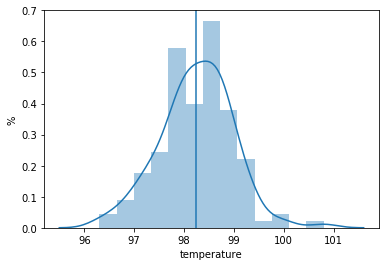

the mean is  98.24923076923078
1 std is  0.7303577789050377
Percent contain in 1 stdev:  69.23 % compare to 68%
Percent contain in 2 stdev:  94.62 % compare to 95%
Percent contain in 3 stdev:  99.23 % compare to 97.5%


In [4]:
#1. Is the distribution of body temperatures normal? Yea sure
temp_mean = np.mean(df.temperature)
temp_std = np.std(df.temperature)

_ = sns.distplot(df['temperature'])
_ = plt.axvline(x=temp_mean)
plt.ylabel('%')
plt.show()

print('the mean is ' , temp_mean)
print('1 std is ' , temp_std)

std1_away = [temp_mean - temp_std , temp_mean + temp_std]
percent_in_1std = len(df.loc[(df.temperature >= std1_away[0]) & (df.temperature<= std1_away[1])]) / len(df) * 100
print('Percent contain in 1 stdev: ' , round(percent_in_1std,2) , '% compare to 68%')

std2_away = [temp_mean - temp_std*2 , temp_mean + temp_std*2]
percent_in_2std = len(df.loc[(df.temperature >= std2_away[0]) & (df.temperature<= std2_away[1])]) / len(df) * 100
print('Percent contain in 2 stdev: ' , round(percent_in_2std,2) , '% compare to 95%')


std3_away = [temp_mean - temp_std*3 , temp_mean + temp_std*3]
percent_in_3std = len(df.loc[(df.temperature >= std3_away[0]) & (df.temperature<= std3_away[1])]) / len(df) * 100
print('Percent contain in 3 stdev: ' , round(percent_in_3std,2) , '% compare to 97.5%')


In [5]:
#2.Is the sample size large? Are the observations independent? 130 > 30 and realtively independent

print('sample space is',len(df))

sample space is 130


C:\Users\leero\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


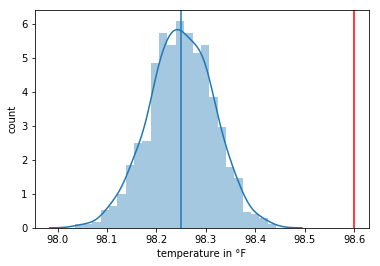

In this situation I would use a t stat. While our sample is greater than 30 
z stat is 5.47 far from typical ± 1.95 level of signifingance
t stat is -5.47  shows radically different result from z-score


In [6]:
#3. Is the true population mean really 98.6 degrees F?
# First, try a bootstrap hypothesis test.
# In this situation, is it appropriate to use the  tt  or  zz  statistic?
# Now try using the other test. How is the result be different? Why?

null_mean = 98.6
ob_temp_mean = np.mean(df.temperature)
ob_temp_std = np.std(df.temperature)
ob_temp_n = len(df.temperature)

temp_samples = draw_bs_reps(df.temperature,np.mean,1000)
temp_samples_mean = np.mean(temp_samples)
temp_samples_std = np.std(temp_samples)

_ = sns.distplot(temp_samples)
_ = plt.axvline(temp_samples_mean)
_ = plt.axvline(null_mean,color='red')
plt.xlabel('temperature in °F')
plt.ylabel('count')

plt.show()

p = np.sum(temp_samples >= null_mean) / len(temp_samples)

if p > 0:
    print('p is ', p)
print('In this situation I would use a t stat. While our sample is greater than 30 ')

z_score = (null_mean- temp_samples_mean) / (ob_temp_std / ob_temp_n**.5)
print('z stat is' , round(z_score , 2) , 'far from typical ± 1.95 level of signifingance')

t_score = (temp_samples_mean - null_mean) / (ob_temp_std / ob_temp_n**.5)
print('t stat is' , round(t_score , 2) , ' shows radically different result from z-score')


***Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?***

We would do a 1 sample test against 98.6. We have a sample and we have a known mean of 98.6.

***In this situation, is it appropriate to use the  tt  or  zz  statistic?***

Z test because the sample is greater than 30.

In [7]:
# Now try using the other test. How is the result be different? Why?

null_mean = 98.6
ob_temp_mean = np.mean(df.temperature)
ob_temp_std = np.std(df.temperature)
ob_temp_n = len(df.temperature)

print('In this situation I would use a z stat.')

z_score = (null_mean - ob_temp_mean) / (ob_temp_std/ ob_temp_n**.5)
print('z stat is' , round(z_score , 2) , 'far from typical ± 1.95 level of signifingance')

t_score = (null_mean - ob_temp_mean) / (ob_temp_std / ob_temp_n**.5)
print('t stat is' , round(t_score , 2) , ' shows same result as the z-score, it is the same forumla')


In this situation I would use a z stat.
z stat is 5.48 far from typical ± 1.95 level of signifingance
t stat is 5.48  shows same result as the z-score, it is the same forumla


C:\Users\leero\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


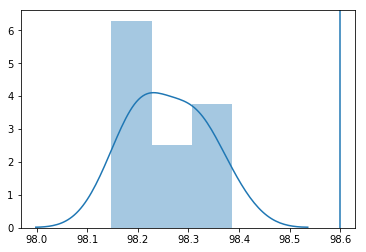

z stat for the sample of 10 is 1.47 far from typical ± 1.95 level of significance and close to the total sample z test
t stat for the sample of 10 is 1.47  shows same result as the z-score, it is the same forumla


In [24]:
#4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

temp_samples_10 = draw_bs_reps(df.temperature,np.mean,10)

_ = sns.distplot(temp_samples_10)
_ = plt.axvline(98.6)
plt.show()

z_score = (null_mean - np.mean(temp_samples_10)) / (ob_temp_std / 10**.5)
print('z stat for the sample of 10 is' , round(z_score , 2) , 'far from typical ± 1.95 level of significance and close to the total sample z test')

t_score = (null_mean - np.mean(temp_samples_10)) / (ob_temp_std / 10**.5)
print('t stat for the sample of 10 is' , round(t_score , 2) , ' shows same result as the z-score, it is the same forumla')

In [26]:
#5. At what temperature should we consider someone's temperature to be "abnormal"?
#As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
#Start by computing the margin of error and confidence interval. 
#When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

n_draws = 100000
temp_samples_n = draw_bs_reps(df.temperature,np.mean,n_draws)
temp_samples_n_mean = np.mean(temp_samples_n)
margin_of_error = ob_temp_std / n_draws ** .5

print('Abnormal temperature would be out of the 95% CI range')

print('mean is',round(temp_samples_n_mean,2))

print('95% CI with margin of error',round(margin_of_error * -1.96 + temp_samples_n_mean,2),round(margin_of_error * 1.96 + temp_samples_n_mean,2))

print('95% CI with percentile',np.percentile(temp_samples_n,[2.5,97.5]))


Abnormal temperature would be out of the 95% CI range
mean is 98.25
95% CI with margin of error 98.24 98.25
95% CI with percentile [98.12307692 98.37384615]


I would us the z score because our sample of 65 is grater than 30, 
The z-score is  3.22  which shows great significance


C:\Users\leero\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\leero\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\leero\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


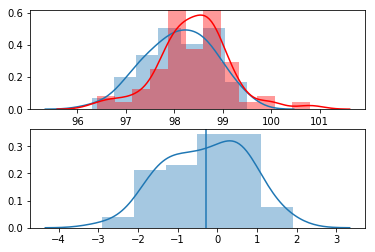

In [14]:
#6. Is there a significant difference between males and females in normal temperature?
#   What testing approach did you use and why?
#   Write a story with your conclusion in the context of the original problem.

temps_m = df.loc[df.gender == 'M'].temperature
temps_f = df.loc[df.gender == 'F'].temperature
temps_d = np.empty(65)

temps_diff_ob = np.mean(temps_m) - np.mean(temps_f)
temps_diff_exp = 0
temps_diff_var = np.var(temps_m) + np.var(temps_f)

for i in range(65):
    temps_d[i] = temps_m.iloc[i] - temps_f.iloc[i]

plt.subplot(2,1,1)
_ = sns.distplot(temps_m)
_ = sns.distplot(temps_f,color='red')

plt.subplot(2,1,2)
_ = sns.distplot(temps_d)
_ = plt.axvline(temps_diff_ob)

z_score = (0 - temps_diff_ob) / (temps_diff_var / (len(temps_m) + len(temps_f)) ** .5)

print('I would us the z score because our sample of 65 is grater than 30, ')
print('The z-score is ' , round(z_score , 2) , ' which shows great significance')

2.2502314642972663


C:\Users\leero\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


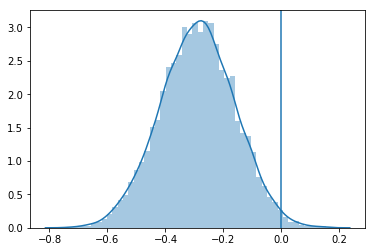

In [15]:
temp_sample_diff = draw_bs_reps(temps_d,np.mean,10000)
temp_sample_mean = np.mean(temp_sample_diff)
temp_sample_std = np.std(temp_sample_diff)


print((0-temp_sample_mean)/temp_sample_std)
_ = sns.distplot(temp_sample_diff)
_ = plt.axvline(0)

Carl Wunderlich in 1868 has reported that the mean human body temperature is 37°C or 98.6°F. In this notebook we put Wunderlich's lost standing statistic to the test. We used data from http://jse.amstat.org/datasets/normtemp.txt that attempted to set accepted mean numbers for human body temperature and heart rate between male and female.

The data set is 130 sample large split between 65 males and 65 females. The data involving temperature is relatively normal and independent. 

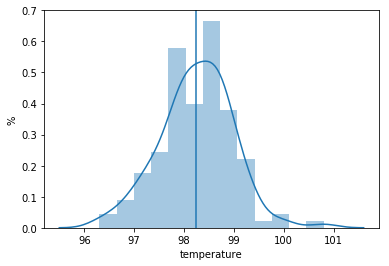

the mean is  98.24923076923078

1 std is  0.7303577789050377

Percent contain in 1 stdev:  69.23 % compare to 68%

Percent contain in 2 stdev:  94.62 % compare to 95%

Percent contain in 3 stdev:  99.23 % compare to 97.5%




Our sample mean of 98.25°F is different from the accepted value of 98.6°F. while, it is not a big difference in terms of magnitude, 0.35 it is a statistically significant. We performed a z-test given that our sample size was greater than 30 and our data was normal. We got a z-stat of around 5.48.

This pushes the idea that Wunderlich’s long standing mean temperature was too high.

In subsequent bootstrap testing we see that a sample mean of 98.6°F just does not show up.

In addition, we also looked at differences between genders and came about a statistically significant result here too. Our assumed mean differences of 0°F was rejected when we got a z-score of 2.27. This suggests that females on average are warmer than males.
